In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Считываем и делаем первчиный анализ данных


In [ ]:
df = pd.read_csv("wine.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
#Бинаризуем качество
df['quality'] = df['quality'].apply(lambda x: 1 if x == 'good' else 0)

In [ ]:
#Сделаем для наглядности пропущенные значения:
df['new_value'] = [np.random.randint(5) if i % 5 != 0 else np.nan for i in range(len(df))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  new_value             1279 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


In [ ]:
df['new_value_red'] = df['new_value'].fillna(0)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_value,new_value_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,NaN,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2.0,2.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2.0,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,2.0,2.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1.0,1.0


In [ ]:
df['new_value_red'] = df['new_value'].fillna(np.mean(df['new_value']))

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_value,new_value_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,NaN,1.971071
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2.0,2.000000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2.0,2.000000
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,2.0,2.000000
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1.0,1.000000


In [ ]:
df['new_value_red'] = df['new_value'].fillna(np.median(df['new_value'][df['new_value'] >= 0]))

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_value,new_value_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,NaN,2.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2.0,2.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2.0,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,2.0,2.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1.0,1.0


In [ ]:
sns.set()

sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

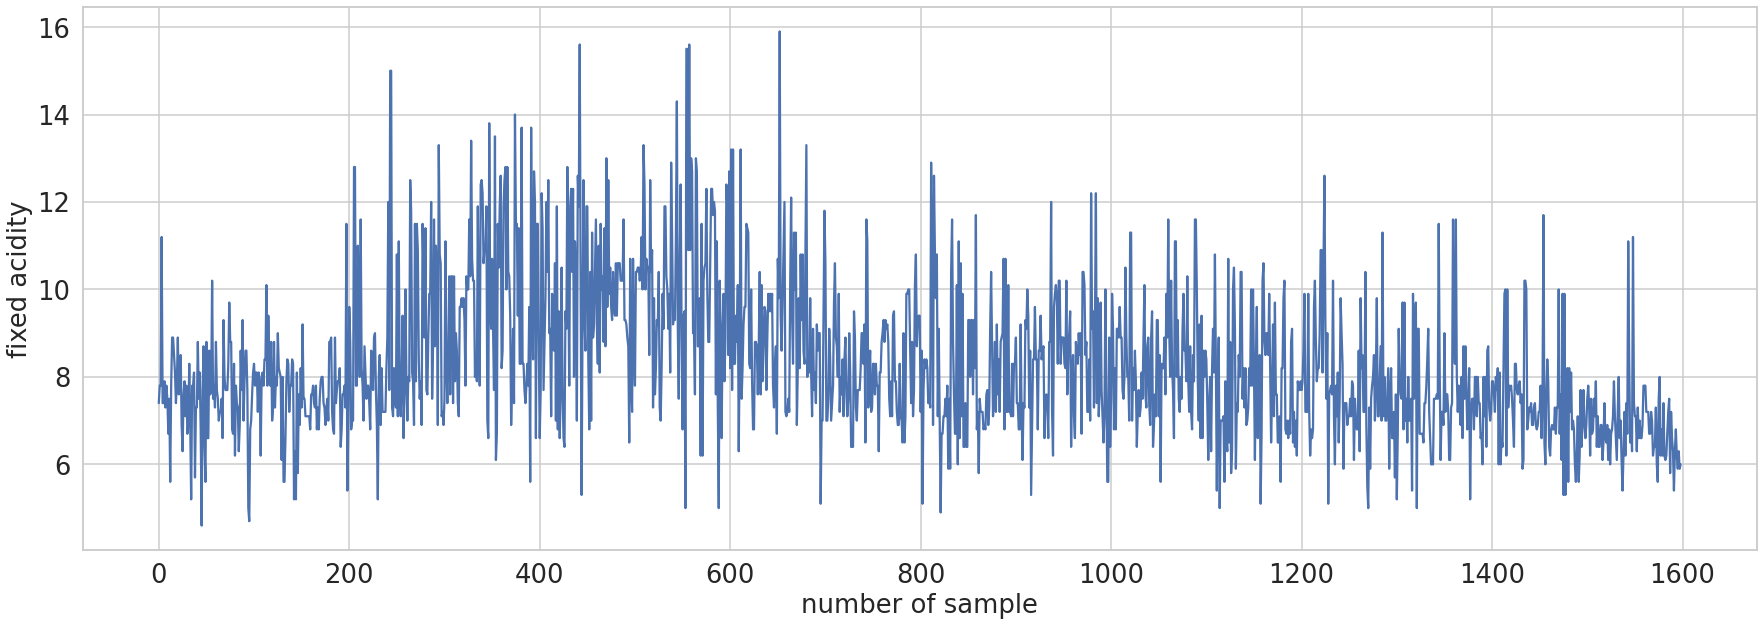

In [ ]:
df['fixed acidity'].plot(xlabel = 'number of sample', ylabel = 'fixed acidity')

In [ ]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df[['MinMaxScaled fixed acidity']] = MinMaxScaler().fit_transform(df[['fixed acidity']])
df[['StandardScaled fixed acidity']] = StandardScaler().fit_transform(df[['fixed acidity']])

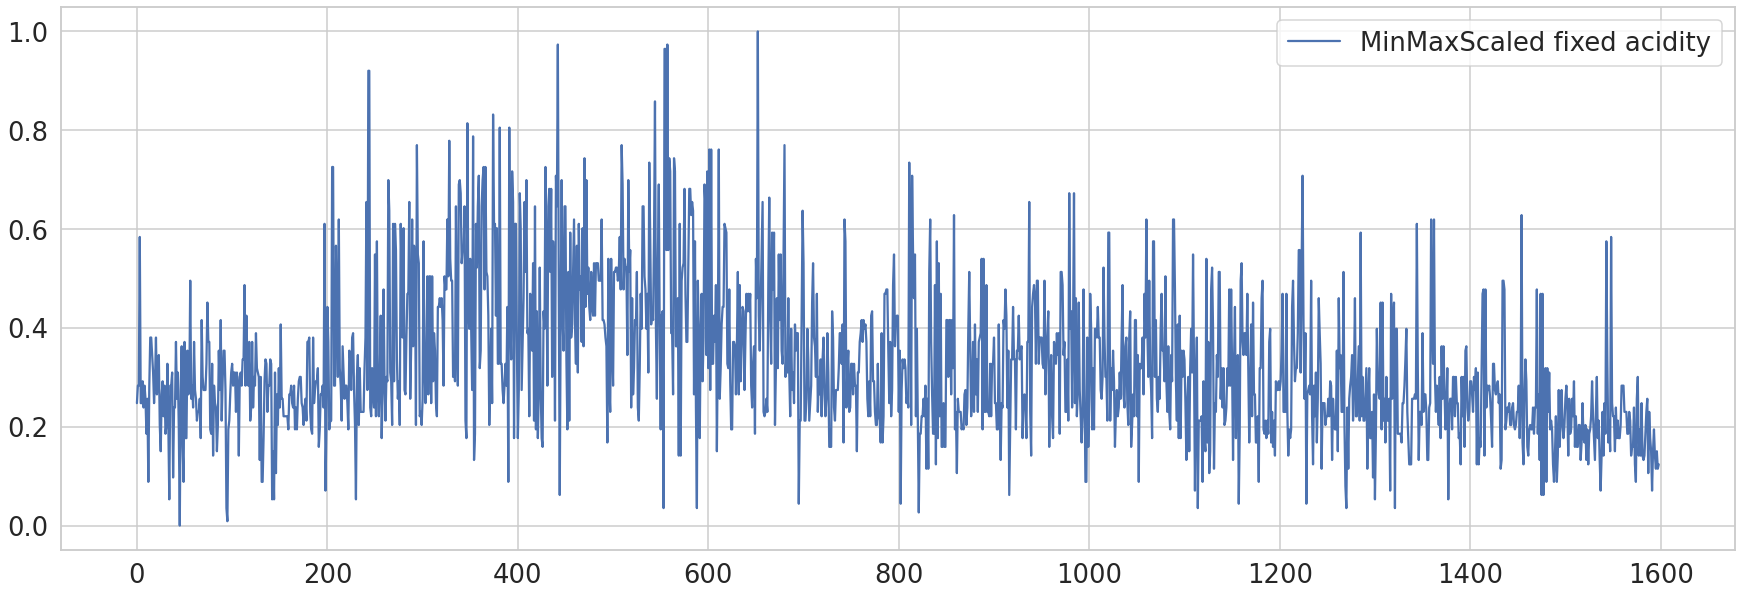

In [ ]:
df[['MinMaxScaled fixed acidity']].plot()

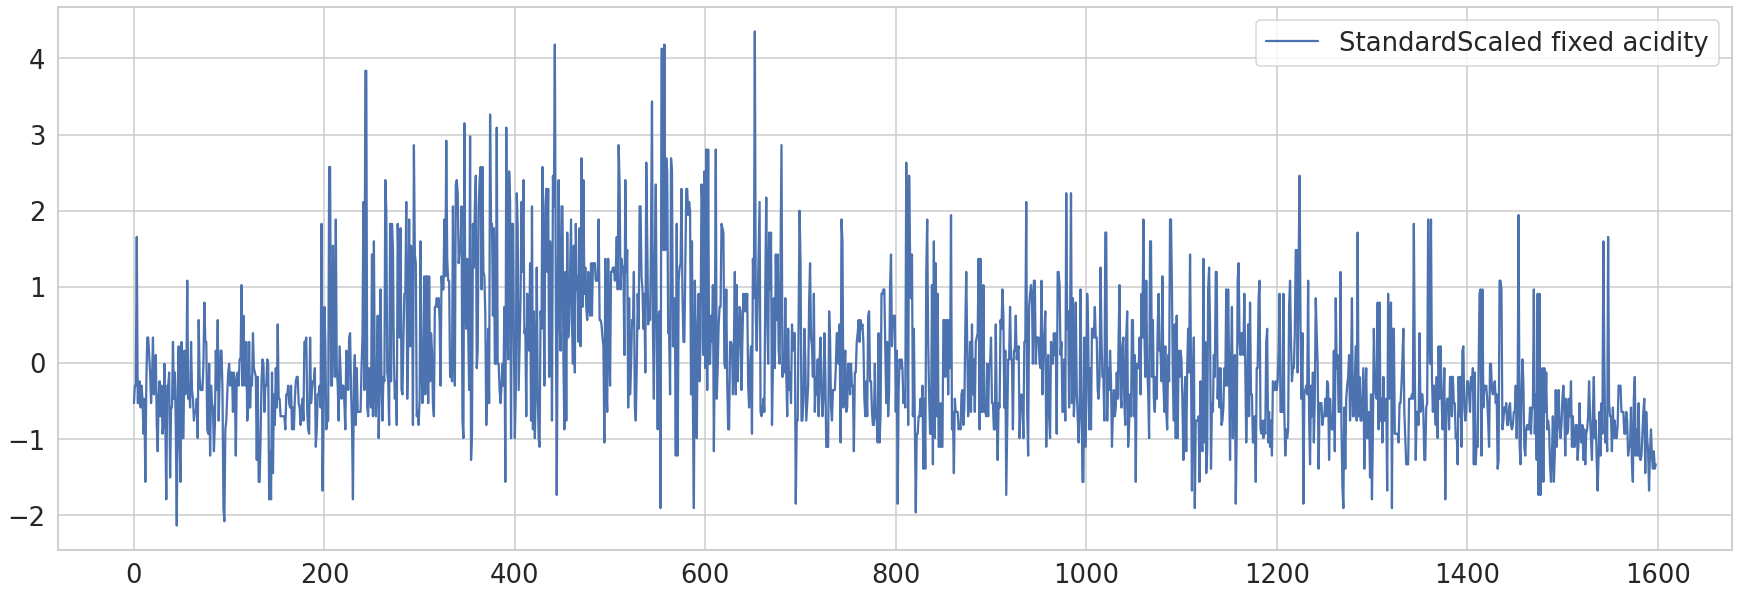

In [ ]:
df[['StandardScaled fixed acidity']].plot()

In [ ]:
plt.style.use('default')

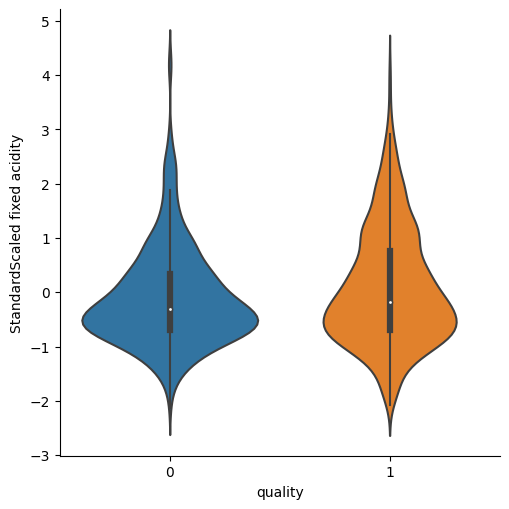

In [ ]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
sns.catplot(x="quality", y="StandardScaled fixed acidity", data=df, kind="violin")

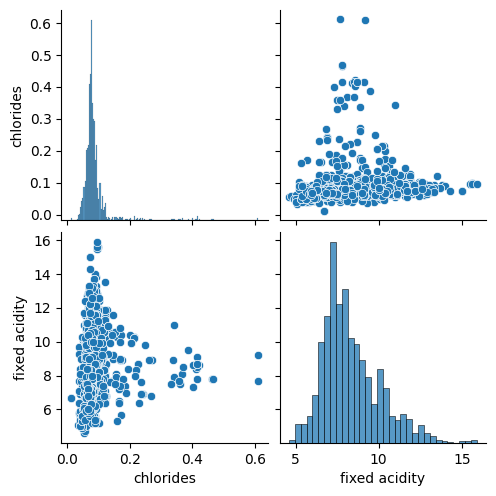

In [ ]:
sns.pairplot(df[['chlorides', 'fixed acidity']])

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_value,new_value_red,MinMaxScaled fixed acidity,StandardScaled fixed acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,NaN,2.0,0.247788,-0.528360
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2.0,2.0,0.283186,-0.298547
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2.0,2.0,0.283186,-0.298547
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,2.0,2.0,0.584071,1.654856
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1.0,1.0,0.247788,-0.528360


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'new_value', 'new_value_red',
       'MinMaxScaled fixed acidity', 'StandardScaled fixed acidity'],
      dtype='object')

In [ ]:
df_clean = df.drop(['new_value', 'new_value_red', 'MinMaxScaled fixed acidity'], axis = 1)

In [ ]:
df_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,StandardScaled fixed acidity
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,-0.528360
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,-0.298547
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,-0.298547
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1.654856
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,-0.528360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,-1.217796
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,-1.390155
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,-1.160343
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,-1.390155


In [ ]:
X = df_clean[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', \
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', \
       'pH', 'sulphates', 'alcohol']]

y = df_clean['quality']

#Деревья 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

Max f1_score on max_depth   19  is  0.7755775577557756


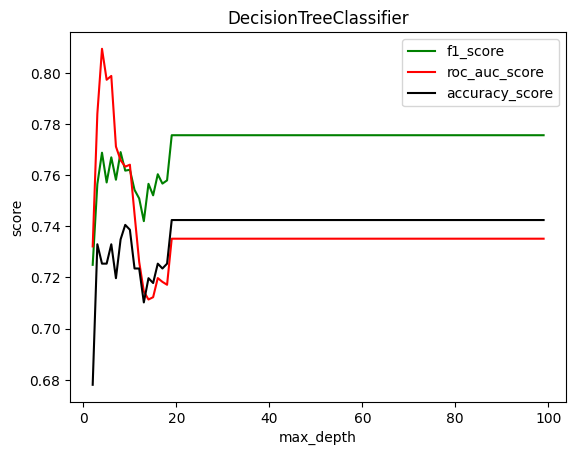

In [ ]:
#Код, который я писал на второй неделе знакомтсва с питоном. Зато наглядно :)

max_c = 0;
max_j = 0;
y_fsc = []
y_rauc = []
y_acc = []
y_ll = []

for j in range(2, 100):
    x_vals = np.arange(2, 100)
    model = DecisionTreeClassifier(max_depth = j, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_sc = f1_score(y_test, y_pred)
    y_fsc.append(f_sc)
    r_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    y_rauc.append(r_auc)
    acc = accuracy_score(y_test, y_pred)
    y_acc.append(acc)
    if f_sc > max_c:
        max_c = f_sc
        max_j = j

print("Max f1_score on max_depth  ",  max_j, " is ", max_c)
plt.figure()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('DecisionTreeClassifier')
plt.plot(x_vals, y_fsc, color = "green", label = "f1_score")
plt.plot(x_vals, y_rauc, color = "red", label = "roc_auc_score")
plt.plot(x_vals, y_acc, color = "black", label = "accuracy_score")
plt.legend()

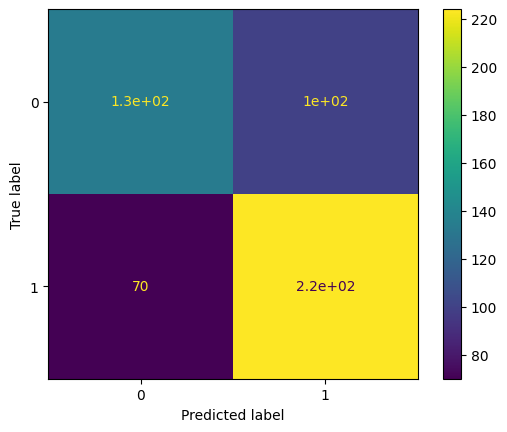

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


model = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy', random_state=0)
model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.67      0.70       234
           1       0.75      0.80      0.78       294

    accuracy                           0.74       528
   macro avg       0.74      0.74      0.74       528
weighted avg       0.74      0.74      0.74       528



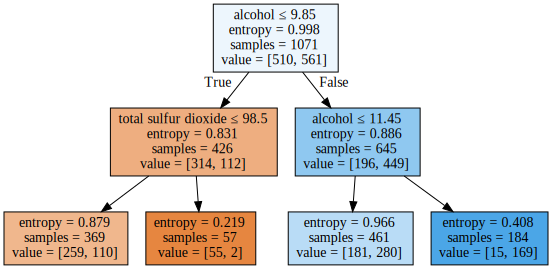

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

model = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy', random_state=0)
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(model, out_file="mytree_md2.dot", feature_names=X_train.columns, impurity=True, filled=True, special_characters=True)
###visualize the .dot file. Need to install graphviz seperately at first 
import graphviz
with open("mytree_md2.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

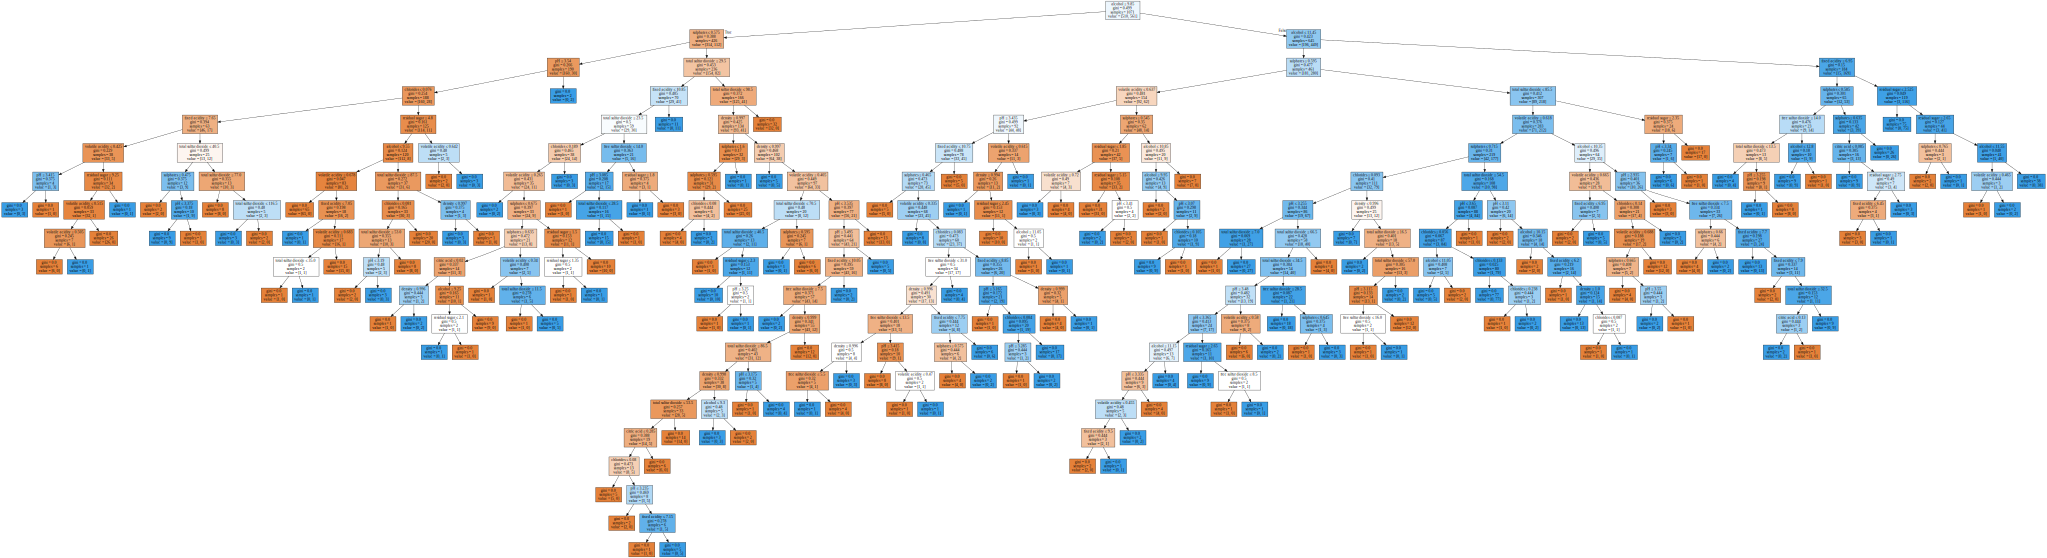

In [ ]:


model = DecisionTreeClassifier(max_depth = 19, random_state=0)
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(model,out_file="mytree_md19.dot", feature_names=X_train.columns,impurity=True,filled=True, special_characters=True)
###visualize the .dot file. Need to install graphviz seperately at first 
import graphviz
with open("mytree_md19.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

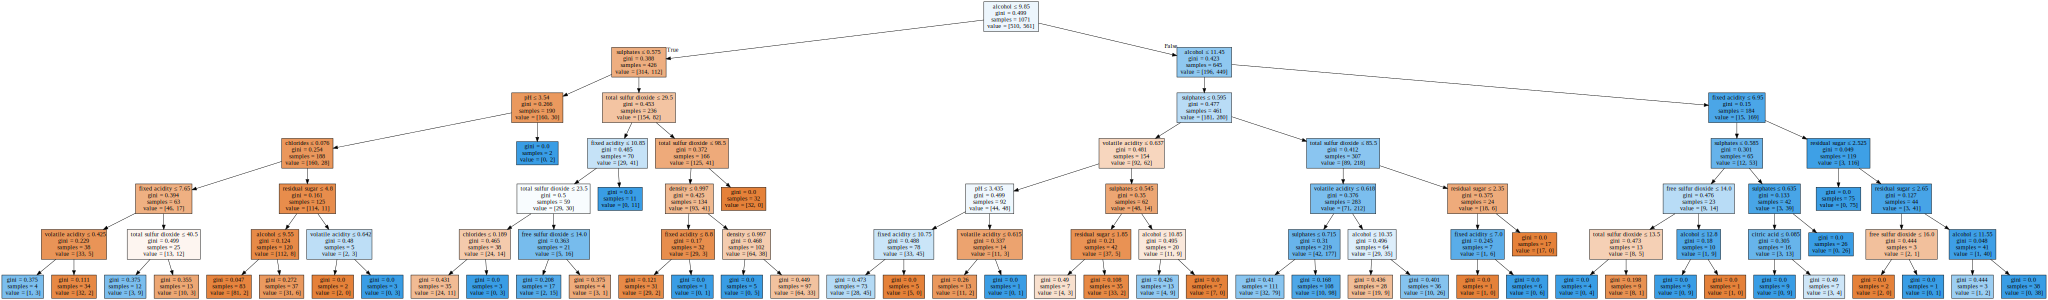

In [ ]:
model = DecisionTreeClassifier(max_depth = 6, random_state=0)
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(model, out_file="mytree_md6.dot", feature_names=X_train.columns, impurity=True, filled=True, special_characters=True)
###visualize the .dot file. Need to install graphviz seperately at first 
import graphviz
with open("mytree_md6.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#KFOLDS

In [ ]:
import sklearn.model_selection
import sklearn.tree
import numpy
from sklearn.neighbors import KNeighborsClassifier

knew = KNeighborsClassifier(n_neighbors=10)
logreg = LogisticRegression(solver = 'liblinear')
destree = DecisionTreeClassifier(max_depth = 8)

kf = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
scores_knew = []
scores_logreg = []
scores_destree = []

data_res = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    knew.fit(X_train, y_train)
    logreg.fit(X_train, y_train)
    destree.fit(X_train, y_train)
    
    pred_knew = knew.predict_proba(X_test)
    pred_logreg = logreg.predict_proba(X_test)
    pred_destree = destree.predict_proba(X_test)

    scores_knew.append(sklearn.metrics.log_loss(y_test, pred_knew))
    scores_logreg.append(sklearn.metrics.log_loss(y_test, pred_logreg))
    scores_destree.append(sklearn.metrics.log_loss(y_test, pred_destree))
    
scores_knew = numpy.array(scores_knew)
scores_logreg = numpy.array(scores_logreg)
scores_destree = numpy.array(scores_destree)
data_res = [{'mean': scores_knew.mean(),  'std': scores_knew.std()}, {'mean': scores_logreg.mean(),  'std': scores_logreg.std()},{'mean': scores_destree.mean(),  'std': scores_destree.std()}]

results_pd = pd.DataFrame(data = data_res, columns = ['mean','std'], index = ['KNeighbors', 'LogisticRegression', 'DecisionTree'])

print("Here is some information about KFold when n_splits=10")
results_pd

Here is some information about KFold when n_splits=10


,mean,std
KNeighbors,1.005970,0.206166
LogisticRegression,0.527691,0.030929
DecisionTree,3.054571,0.712419
